# Лабораторная работа №4

ФИО:    Касрадзе Джамал Зурабович

Группа: БИВТ-21-5

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №8 в семестре (Занятие №4 очное)

Что необходимо сделать:  
- Обучить различные модели глубокого обучения на имеющихся данных  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).
5. Обучить на тренировочном множестве:
     1. Очень простую однослойную нейросеть с оптимизатором `SGD` ([link](https://pytorch.org/docs/stable/optim.html)).
     2. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
     3. Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки `matplotlib` (выйдет так называемая **learning curve**, кривая обучения модели).
6. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy
     2. Для задачи регрессии -- MAE
7. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, у вас не будет проблем, просто нужно будет поставить необходимое количество нейронов на выходе вашей нейросети.

## 1. Пример импорта данных. Грузим данные

In [88]:
import pandas as pd
data = pd.read_csv('../L2/dataset.csv', sep=',')  # если нужно, можно поменять разделитель
data = data.query("(PROPERTYSQFT != 2184.207862) & (PRICE < 10000000) & (PRICE > 100) & (PROPERTYSQFT < 100000) & (PROPERTYSQFT > 256)")
data.set_index("PRICE")

,BROKERTITLE,TYPE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
PRICE,,,,,,,,,,,,,,,,
315000,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
260000,Brokered by Sowae Corp,House for sale,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
69000,Brokered by COMPASS,Condo for sale,3,1.0,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
690000,Brokered by Sowae Corp,House for sale,5,2.0,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
265000,Brokered by Pantiga Group Inc.,Co-op for sale,1,1.0,750.0,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700000,Brokered by Ilite Realty Inc,Multi-family home for sale,3,7.0,7854.0,448 40th St,"Brooklyn, NY 11232","448 40th StBrooklyn, NY 11232",United States,New York,Kings County,Brooklyn,40th Street,"448 40th St, Brooklyn, NY 11232, USA",40.651222,-74.005780
945000,Brokered by Brown Harris Stevens,Condo for sale,2,2.0,903.0,2351 Adam Clayton Powell Jr Blvd Apt 614,"Manhattan, NY 10030",2351 Adam Clayton Powell Jr Blvd Apt 614Manhat...,New York,New York County,New York,Manhattan,2351,2351 Adam Clayton Powell Jr Blvd Apartment 614...,40.816711,-73.942050
2999999,Brokered by RE MAX Edge,Multi-family home for sale,15,9.0,3600.0,2825-2827 W 15th St,"Brooklyn, NY 11224","2825-2827 W 15th StBrooklyn, NY 11224",United States,New York,Kings County,Brooklyn,West 15th Street,"2825 W 15th St, Brooklyn, NY 11224, USA",40.578450,-73.982739


## 2. Понимаем, какая перед нами задача

Задача регрессии, определение цены апартаментов по площади.

## 3. Делаем предобработку данных

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import math
import numpy as np

cat_cols = [
    'TYPE', 
    'ADMINISTRATIVE_AREA_LEVEL_2',
    'LOCALITY',
    'SUBLOCALITY',
]
num_cols = [
    'BEDS',
    'BATH',
    'PROPERTYSQFT',
    'LATITUDE',
    'LONGITUDE'
]
X = data.drop(['PRICE'], axis=1)
X_num = X[num_cols]
X_cat = pd.get_dummies(X[cat_cols]).astype(np.float64)
X = X_num.join(X_cat)
y = np.log(data['PRICE'])
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.apply(lambda x: x.nunique())

(3057, 70) (3057,)


BEDS                             22
BATH                             18
PROPERTYSQFT                   1167
LATITUDE                       2214
LONGITUDE                      2193
                               ... 
SUBLOCALITY_Richmond County       2
SUBLOCALITY_Riverdale             2
SUBLOCALITY_Snyder Avenue         2
SUBLOCALITY_Staten Island         2
SUBLOCALITY_The Bronx             2
Length: 70, dtype: int64

## 4. Оформить данные в виде класса Dataset
Оформить данные в виде класса Dataset из библиотеки torch (как мы это делали на семинаре), а затем засунуть в Dataloader (тоже делали на семинаре).

In [90]:
from torch.utils.data import Dataset, DataLoader
import torch

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x.values)
        self.y = torch.tensor(y.values)
        print(x.shape, y.shape)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, i):
        return self.x[i], self.y[i]
    
train = MyDataset(X_train, y_train)
test = MyDataset(X_test, y_test)    
train_dataloader = DataLoader(train, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test, batch_size=128, shuffle=True)

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

(2445, 70) (2445,)
(612, 70) (612,)
Feature batch shape: torch.Size([128, 70])
Labels batch shape: torch.Size([128])


## 5. Обучить на тренировочном множестве
Обучить на тренировочном множестве:

    Очень простую однослойную нейросеть с оптимизатором SGD (link).
    Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором Adam (link).
    Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором Adam (link).


In [91]:
#A Однослойная
from torch import nn

class NNA(nn.Module):
    def __init__(self):
        super(NNA, self).__init__() 
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(70, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1)
        )
        self.double()

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [92]:
#B Один скрытый слой
class NNB(nn.Module):
    def __init__(self):
        super(NNB, self).__init__() 
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(70, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )
        self.double()

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [93]:
#C Три скрытых слоя
class NNC(nn.Module):
    def __init__(self):
        super(NNC, self).__init__() 
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(70, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )
        self.double()

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

## 6. Посчитайте loss на train и test множествах
Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки matplotlib (выйдет так называемая learning curve, кривая обучения модели).

In [94]:
#misc
def test_suit(epochs, report_rate, model, loss_fn, optimizer, curve_mse):
    global test_dataloader, train_dataloader
    for t in range(epochs):
        verbose = (t+1)%report_rate==0
        if verbose: print(f"Epoch {t+1}\n-------------------------------")
        train_loop(train_dataloader, model, loss_fn, optimizer, verbose)
        curve_mse.append(test_loop(test_dataloader, model, loss_fn, verbose))
    print("Done!")

def train_loop(dataloader, model, loss_fn, optimizer, verbose=True):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            if verbose: print(f"loss: {loss:>7f}")
            
def test_loop(dataloader, model, loss_fn, verbose):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
    test_loss /= num_batches
    correct /= size
    if verbose: print(
        f"Test Error: Avg loss: {test_loss:>8f} \n"
    )
    return test_loss

Task A------------
Epoch 64
-------------------------------
loss: 0.747854
Test Error: Avg loss: 0.762901 

Done!


Task B------------
Epoch 64
-------------------------------
loss: 0.758359
Test Error: Avg loss: 0.761214 

Done!


Task C------------
Epoch 64
-------------------------------
loss: 3.500962
Test Error: Avg loss: 0.845060 

Done!


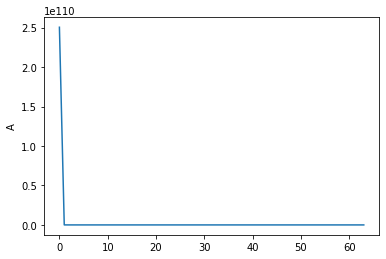

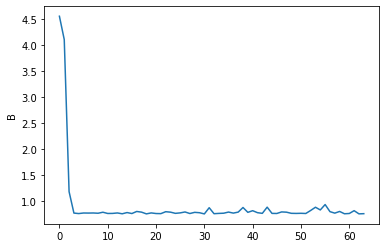

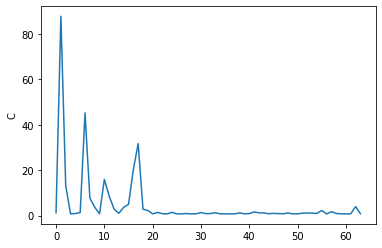

In [160]:
#error
learning_rate = 1e-1
#A
curve_A = []
print("Task A------------")
modelA = NNA()
model.taining = True
optimizer = torch.optim.SGD(modelA.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()
test_suit(64, 64, modelA, loss_fn, optimizer, curve_A)
#B
curve_B = []
print("\n\nTask B------------")
modelB = NNB()
optimizer = torch.optim.Adam(modelB.parameters(), lr=learning_rate)
test_suit(64, 64, modelB, loss_fn, optimizer, curve_B)
#C
curve_C = []
print("\n\nTask C------------")
modelC = NNC()
optimizer = torch.optim.Adam(modelC.parameters(), lr=learning_rate)
test_suit(64, 64, modelC, loss_fn, optimizer, curve_C)
import matplotlib.pyplot as plt 
import numpy as np 
import math 
plt.plot(curve_A)
plt.ylabel('A')
plt.show()
plt.plot(curve_B)
plt.ylabel('B')
plt.show()
plt.plot(curve_C)
plt.ylabel('C')
plt.show()

## 7. Посчитать метрики на train и test множествах
Посчитайте метрики на train и test множествах:
Для задачи регрессии -- MAE



In [145]:
from sklearn.metrics import mean_absolute_error as mae
predA = modelA(torch.tensor(X_test.values)).detach().numpy()
predB = modelB(torch.tensor(X_test.values)).detach().numpy()
predC = modelC(torch.tensor(X_test.values)).detach().numpy()
print("MSE:")
print("A:", mae(y, predA))
print("B:", mae(y, predB))
print("C:", mae(y, predC))

MSE:
A: 0.6752140579179773
B: 0.6915094837514266
C: 0.6833435014784693


## 8. Сравнить метрики относительно train/test
Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:

    Какая модель справилась лучше с поставленной задачей?
    Имеет ли место переобучение?
    Имеет ли место недообучение?
    Как можно улучшить метрики моделей?


Все три модели хорошо справились с задачей, сходясь в значении ошибки примерно у значения 0.7. На графиках выше показано относительно удачное стечение обстоятельств для варианта А, так от запуска к запуску он может не сойтись к низкому значению ошибки, не стабилен, в отличии от остальных. При низкой скорости обучения модель С значительно опережает остальных, но на высоких значениях может быть заметно медленнее. Ожидаемо модель В где-то посередине.

Следов переобучения не вижу, предсказания на тестовой выборке достаточно точные и сравнимые с тренировочными.

Следов недообученния не видно, значения ошибки на тренировочном множестве близки к ошибке тренировочного.

Метрики уже довольно хороши, можно настроить скорость обучения, количество узлов в слоях, число поколений.